## Data Cleaning and Preprocessing

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# Checking the dimensions of the dataframe
churn_data.shape

(99999, 226)

In [5]:
# Checking the type of each column
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
for i in range(0,226):
    print(churn_data.columns[i], " : ", round(100*(churn_data.isnull().sum()[i]/len(churn_data.index)),2))

mobile_number  :  0.0
circle_id  :  0.0
loc_og_t2o_mou  :  1.02
std_og_t2o_mou  :  1.02
loc_ic_t2o_mou  :  1.02
last_date_of_month_6  :  0.0
last_date_of_month_7  :  0.6
last_date_of_month_8  :  1.1
last_date_of_month_9  :  1.66
arpu_6  :  0.0
arpu_7  :  0.0
arpu_8  :  0.0
arpu_9  :  0.0
onnet_mou_6  :  3.94
onnet_mou_7  :  3.86
onnet_mou_8  :  5.38
onnet_mou_9  :  7.75
offnet_mou_6  :  3.94
offnet_mou_7  :  3.86
offnet_mou_8  :  5.38
offnet_mou_9  :  7.75
roam_ic_mou_6  :  3.94
roam_ic_mou_7  :  3.86
roam_ic_mou_8  :  5.38
roam_ic_mou_9  :  7.75
roam_og_mou_6  :  3.94
roam_og_mou_7  :  3.86
roam_og_mou_8  :  5.38
roam_og_mou_9  :  7.75
loc_og_t2t_mou_6  :  3.94
loc_og_t2t_mou_7  :  3.86
loc_og_t2t_mou_8  :  5.38
loc_og_t2t_mou_9  :  7.75
loc_og_t2m_mou_6  :  3.94
loc_og_t2m_mou_7  :  3.86
loc_og_t2m_mou_8  :  5.38
loc_og_t2m_mou_9  :  7.75
loc_og_t2f_mou_6  :  3.94
loc_og_t2f_mou_7  :  3.86
loc_og_t2f_mou_8  :  5.38
loc_og_t2f_mou_9  :  7.75
loc_og_t2c_mou_6  :  3.94
loc_og_t2c_mou_7 

In [7]:
# Let's drop the columns with high missing values
# List of columns with high missing values (>70%)
high_missing_cols = [
    'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
    'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
    'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
    'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
    'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
    'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
    'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
    'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 
    'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'
]

churn_data.drop(columns=high_missing_cols, inplace=True)


In [8]:
# Columns with low missing values
low_missing_cols = [
    'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7', 
    'last_date_of_month_8', 'last_date_of_month_9', 'onnet_mou_6', 'onnet_mou_7',
    'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 
    'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 
    'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6',
    'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
    'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6',
    'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6',
    'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
    'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
    'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
    'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
    'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
    'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
    'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9',
    'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_og_mou_9', 'og_others_6',
    'og_others_7', 'og_others_8', 'og_others_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
    'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
    'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
    'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
    'loc_ic_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
    'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
    'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
    'std_ic_t2f_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
    'std_ic_t2o_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9',
    'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6',
    'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
    'ic_others_8', 'ic_others_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
    'date_of_last_rech_8', 'date_of_last_rech_9'
]

In [9]:
# Imputing the missings values with median for a column of float dtype 
# and mode for a column of object dtype
for col in low_missing_cols:
    if churn_data[col].dtype == float:
        churn_data[col].fillna(churn_data[col].median(), inplace=True)
    else:
        churn_data[col].fillna(churn_data[col].mode()[0],inplace=True)


In [10]:
# Checking the dimensions after dropping and imputing the values
churn_data.shape

(99999, 186)

In [11]:
# Let's check for the missing values again

for i in range(churn_data.shape[1]):
    print(churn_data.columns[i], " : ", round(100*(churn_data.isnull().sum()[i]/len(churn_data.index)),2))

mobile_number  :  0.0
circle_id  :  0.0
loc_og_t2o_mou  :  0.0
std_og_t2o_mou  :  0.0
loc_ic_t2o_mou  :  0.0
last_date_of_month_6  :  0.0
last_date_of_month_7  :  0.0
last_date_of_month_8  :  0.0
last_date_of_month_9  :  0.0
arpu_6  :  0.0
arpu_7  :  0.0
arpu_8  :  0.0
arpu_9  :  0.0
onnet_mou_6  :  0.0
onnet_mou_7  :  0.0
onnet_mou_8  :  0.0
onnet_mou_9  :  0.0
offnet_mou_6  :  0.0
offnet_mou_7  :  0.0
offnet_mou_8  :  0.0
offnet_mou_9  :  0.0
roam_ic_mou_6  :  0.0
roam_ic_mou_7  :  0.0
roam_ic_mou_8  :  0.0
roam_ic_mou_9  :  0.0
roam_og_mou_6  :  0.0
roam_og_mou_7  :  0.0
roam_og_mou_8  :  0.0
roam_og_mou_9  :  0.0
loc_og_t2t_mou_6  :  0.0
loc_og_t2t_mou_7  :  0.0
loc_og_t2t_mou_8  :  0.0
loc_og_t2t_mou_9  :  0.0
loc_og_t2m_mou_6  :  0.0
loc_og_t2m_mou_7  :  0.0
loc_og_t2m_mou_8  :  0.0
loc_og_t2m_mou_9  :  0.0
loc_og_t2f_mou_6  :  0.0
loc_og_t2f_mou_7  :  0.0
loc_og_t2f_mou_8  :  0.0
loc_og_t2f_mou_9  :  0.0
loc_og_t2c_mou_6  :  0.0
loc_og_t2c_mou_7  :  0.0
loc_og_t2c_mou_8  :  0.0


In [12]:
for i in range(churn_data.shape[1]):
    print(churn_data.columns[i], " : ", churn_data[churn_data.columns[i]].dtype)

mobile_number  :  int64
circle_id  :  int64
loc_og_t2o_mou  :  float64
std_og_t2o_mou  :  float64
loc_ic_t2o_mou  :  float64
last_date_of_month_6  :  object
last_date_of_month_7  :  object
last_date_of_month_8  :  object
last_date_of_month_9  :  object
arpu_6  :  float64
arpu_7  :  float64
arpu_8  :  float64
arpu_9  :  float64
onnet_mou_6  :  float64
onnet_mou_7  :  float64
onnet_mou_8  :  float64
onnet_mou_9  :  float64
offnet_mou_6  :  float64
offnet_mou_7  :  float64
offnet_mou_8  :  float64
offnet_mou_9  :  float64
roam_ic_mou_6  :  float64
roam_ic_mou_7  :  float64
roam_ic_mou_8  :  float64
roam_ic_mou_9  :  float64
roam_og_mou_6  :  float64
roam_og_mou_7  :  float64
roam_og_mou_8  :  float64
roam_og_mou_9  :  float64
loc_og_t2t_mou_6  :  float64
loc_og_t2t_mou_7  :  float64
loc_og_t2t_mou_8  :  float64
loc_og_t2t_mou_9  :  float64
loc_og_t2m_mou_6  :  float64
loc_og_t2m_mou_7  :  float64
loc_og_t2m_mou_8  :  float64
loc_og_t2m_mou_9  :  float64
loc_og_t2f_mou_6  :  float64
loc_og

## Exploratory Data Analysis

In [13]:
# Analysing the statistical aspects
statistical_cols = []
for i in range(churn_data.shape[1]):
    if churn_data[churn_data.columns[i]].dtype == 'float':
        statistical_cols.append(churn_data.columns[i])

In [14]:
statistical_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [15]:
# Statistical Analysis of numeric columns
for i in statistical_cols:
    print(i)
    print(churn_data[i].describe())
    print("\n")

loc_og_t2o_mou
count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


std_og_t2o_mou
count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


loc_ic_t2o_mou
count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_ic_t2o_mou, dtype: float64


arpu_6
count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


arpu_7
count    99999.000000
mean       278.536648
std        338.156291
min      -2014.045000
25%         86.980500
50%        191.640000
75%        365.344500
max      35145.834000
Name: arpu_7, dtype: float64


ar

### Data Visualization

In [16]:
# There are some columns with zero variance
# Dropping these columns
zero_variance_cols = ["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8"]
churn_data.drop(columns=zero_variance_cols, inplace = True)

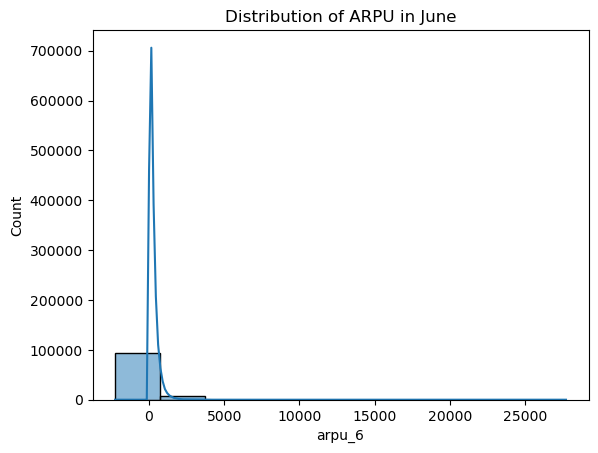

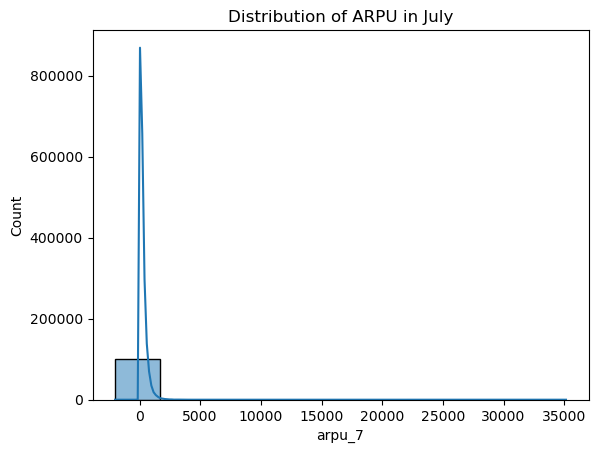

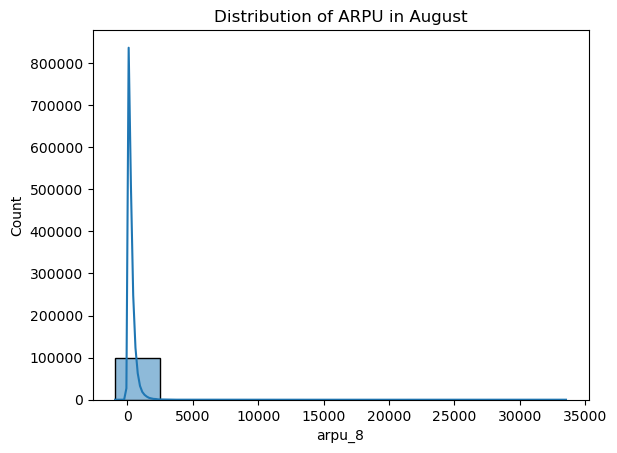

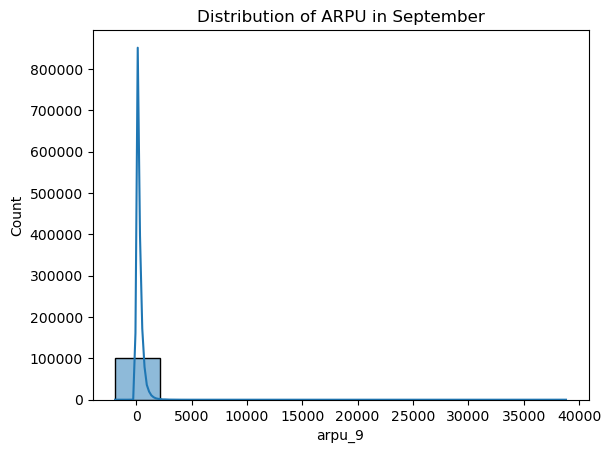

In [17]:
# Plotting ARPU (Average Revenue Per User)
sns.histplot(churn_data['arpu_6'], bins=10, kde = True)
plt.title('Distribution of ARPU in June')
plt.show()

sns.histplot(churn_data['arpu_7'], bins=10, kde = True)
plt.title('Distribution of ARPU in July')
plt.show()

sns.histplot(churn_data['arpu_8'], bins=10, kde = True)
plt.title('Distribution of ARPU in August')
plt.show()

sns.histplot(churn_data['arpu_9'], bins=10, kde = True)
plt.title('Distribution of ARPU in September')
plt.show()

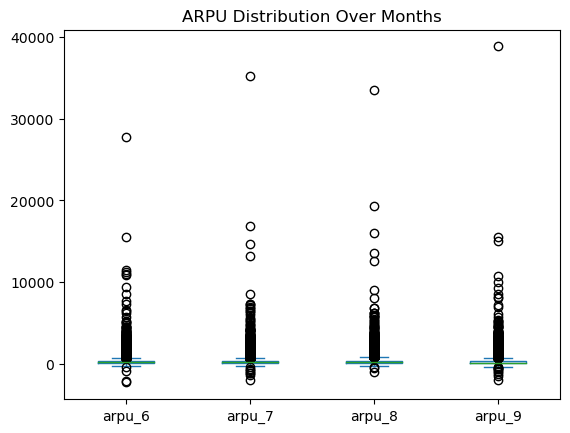

In [18]:
# Month-on-Month ARPU Comparison
arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9']
churn_data[arpu_cols].plot(kind='box')
plt.title('ARPU Distribution Over Months')
plt.show()


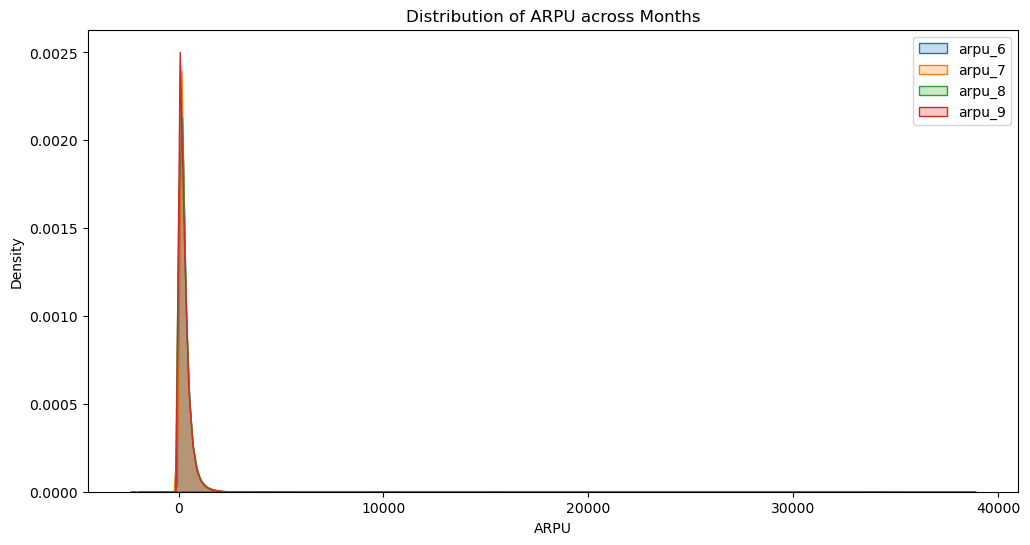

In [19]:
# Revenue Analysis - ARPU
arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9']
plt.figure(figsize=(12, 6))
for col in arpu_cols:
    sns.kdeplot(churn_data[col], label=col, shade=True)
plt.title('Distribution of ARPU across Months')
plt.xlabel('ARPU')
plt.ylabel('Density')
plt.legend()
plt.show()

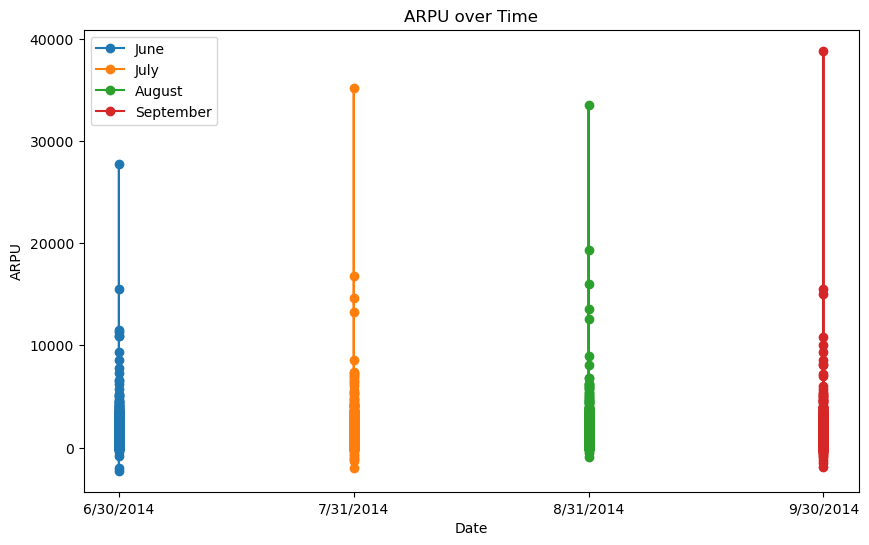

In [20]:
# Line Plot for ARPU over different months
plt.figure(figsize=(10, 6))
plt.plot(churn_data['last_date_of_month_6'], churn_data['arpu_6'], label='June', marker='o')
plt.plot(churn_data['last_date_of_month_7'], churn_data['arpu_7'], label='July', marker='o')
plt.plot(churn_data['last_date_of_month_8'], churn_data['arpu_8'], label='August', marker='o')
plt.plot(churn_data['last_date_of_month_9'], churn_data['arpu_9'], label='September', marker='o')
plt.xlabel('Date')
plt.ylabel('ARPU')
plt.title('ARPU over Time')
plt.legend()
plt.show()


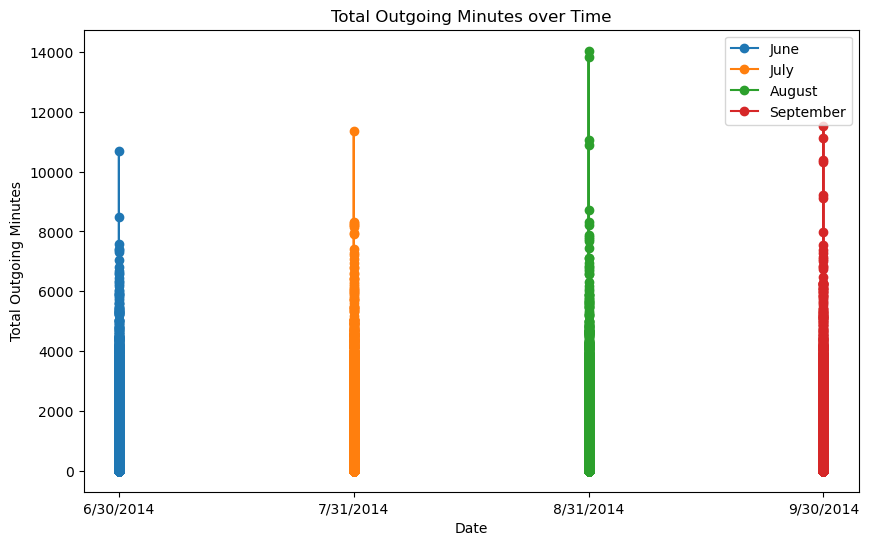

In [21]:
# Line Plot for Total Outgoing Minutes over different months
plt.figure(figsize=(10, 6))
plt.plot(churn_data['last_date_of_month_6'], churn_data['total_og_mou_6'], label='June', marker='o')
plt.plot(churn_data['last_date_of_month_7'], churn_data['total_og_mou_7'], label='July', marker='o')
plt.plot(churn_data['last_date_of_month_8'], churn_data['total_og_mou_8'], label='August', marker='o')
plt.plot(churn_data['last_date_of_month_9'], churn_data['total_og_mou_9'], label='September', marker='o')
plt.xlabel('Date')
plt.ylabel('Total Outgoing Minutes')
plt.title('Total Outgoing Minutes over Time')
plt.legend()
plt.show()

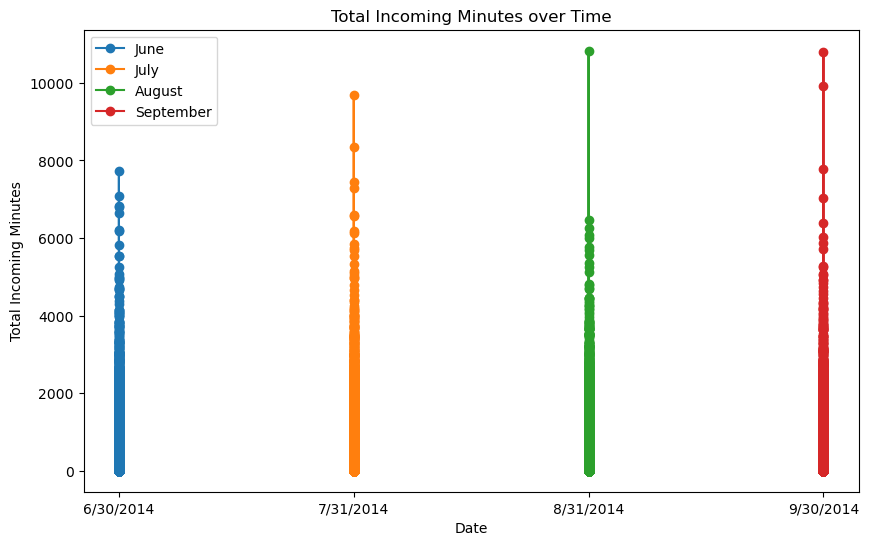

In [22]:
# Line Plot for Total Incoming Minutes over different months
plt.figure(figsize=(10, 6))
plt.plot(churn_data['last_date_of_month_6'], churn_data['total_ic_mou_6'], label='June', marker='o')
plt.plot(churn_data['last_date_of_month_7'], churn_data['total_ic_mou_7'], label='July', marker='o')
plt.plot(churn_data['last_date_of_month_8'], churn_data['total_ic_mou_8'], label='August', marker='o')
plt.plot(churn_data['last_date_of_month_9'], churn_data['total_ic_mou_9'], label='September', marker='o')
plt.xlabel('Date')
plt.ylabel('Total Incoming Minutes')
plt.title('Total Incoming Minutes over Time')
plt.legend()
plt.show()

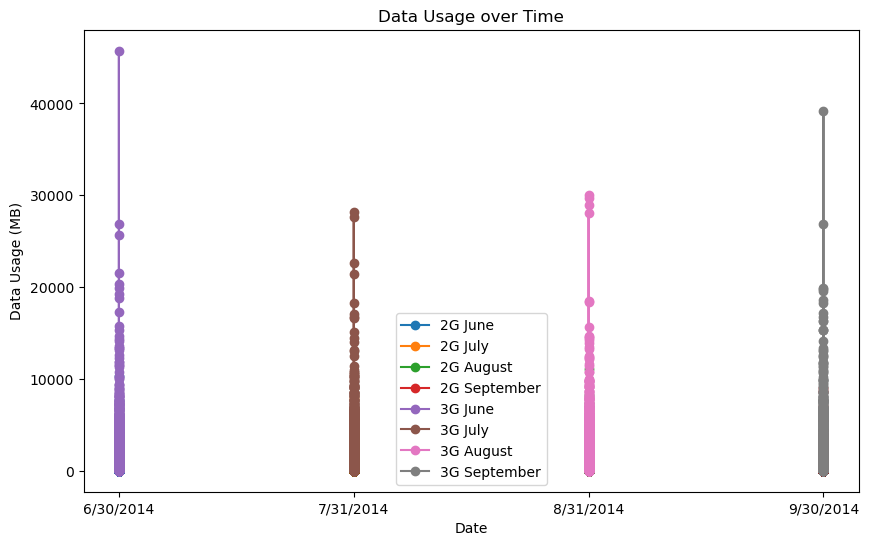

In [23]:
# Line Plot for Data Usage over different months
plt.figure(figsize=(10, 6))
plt.plot(churn_data['last_date_of_month_6'], churn_data['vol_2g_mb_6'], label='2G June', marker='o')
plt.plot(churn_data['last_date_of_month_7'], churn_data['vol_2g_mb_7'], label='2G July', marker='o')
plt.plot(churn_data['last_date_of_month_8'], churn_data['vol_2g_mb_8'], label='2G August', marker='o')
plt.plot(churn_data['last_date_of_month_9'], churn_data['vol_2g_mb_9'], label='2G September', marker='o')
plt.plot(churn_data['last_date_of_month_6'], churn_data['vol_3g_mb_6'], label='3G June', marker='o')
plt.plot(churn_data['last_date_of_month_7'], churn_data['vol_3g_mb_7'], label='3G July', marker='o')
plt.plot(churn_data['last_date_of_month_8'], churn_data['vol_3g_mb_8'], label='3G August', marker='o')
plt.plot(churn_data['last_date_of_month_9'], churn_data['vol_3g_mb_9'], label='3G September', marker='o')
plt.xlabel('Date')
plt.ylabel('Data Usage (MB)')
plt.title('Data Usage over Time')
plt.legend()
plt.show()


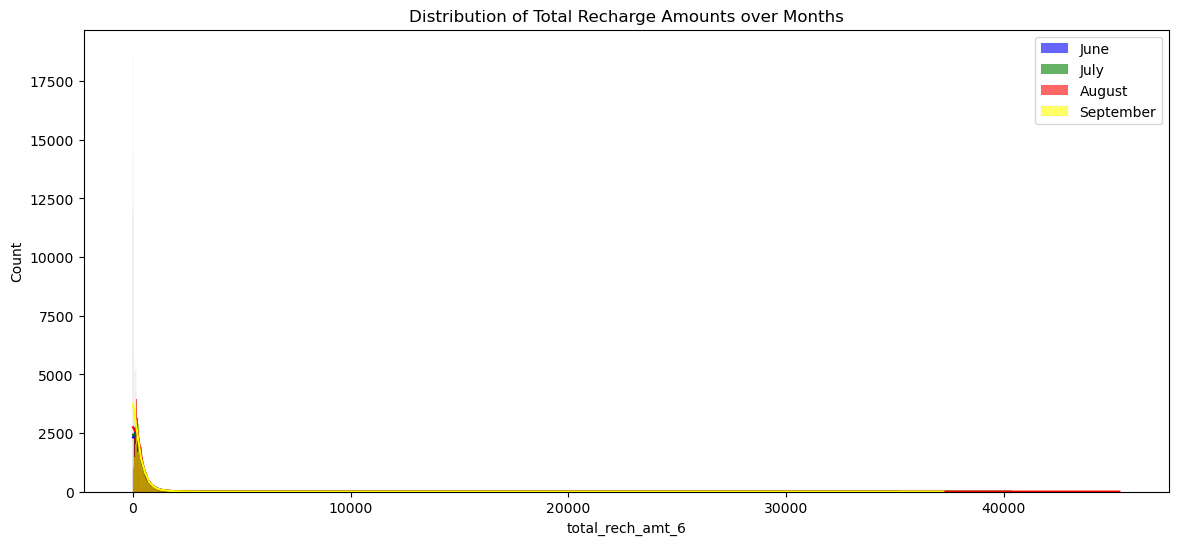

In [24]:
# Distribution Plots for Total Recharge Amounts over different months
plt.figure(figsize=(14, 6))
sns.histplot(churn_data['total_rech_amt_6'], kde=True, color='blue', label='June', alpha=0.6)
sns.histplot(churn_data['total_rech_amt_7'], kde=True, color='green', label='July', alpha=0.6)
sns.histplot(churn_data['total_rech_amt_8'], kde=True, color='red', label='August', alpha=0.6)
sns.histplot(churn_data['total_rech_amt_9'], kde=True, color='yellow', label='September', alpha=0.6)
plt.legend()
plt.title('Distribution of Total Recharge Amounts over Months')
plt.show()

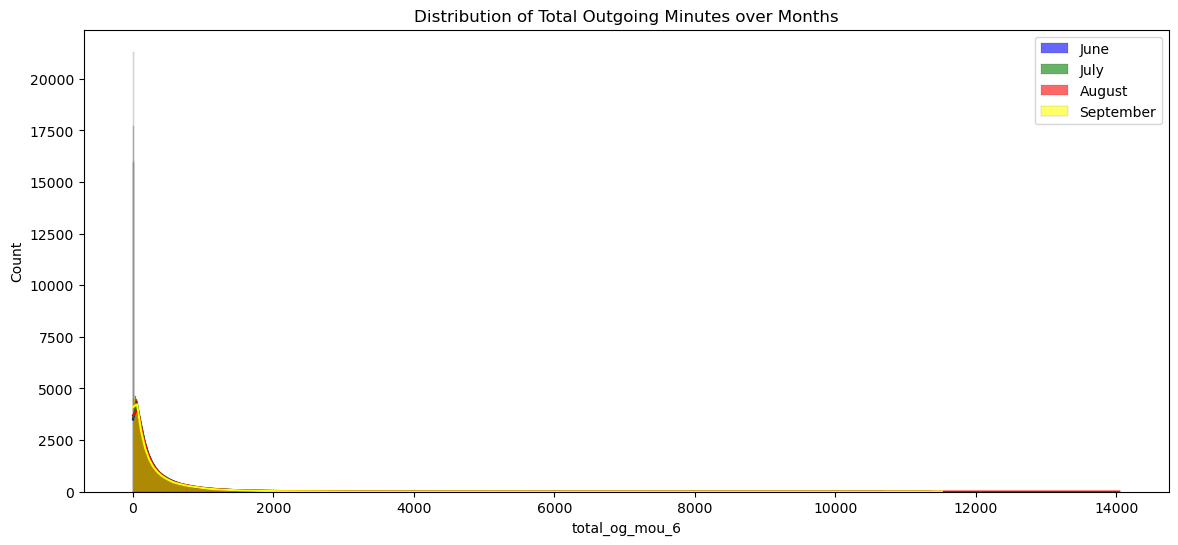

In [25]:
# Distribution Plots for Total Outgoing Minutes over different months
plt.figure(figsize=(14, 6))
sns.histplot(churn_data['total_og_mou_6'], kde=True, color='blue', label='June', alpha=0.6)
sns.histplot(churn_data['total_og_mou_7'], kde=True, color='green', label='July', alpha=0.6)
sns.histplot(churn_data['total_og_mou_8'], kde=True, color='red', label='August', alpha=0.6)
sns.histplot(churn_data['total_og_mou_9'], kde=True, color='yellow', label='September', alpha=0.6)
plt.legend()
plt.title('Distribution of Total Outgoing Minutes over Months')
plt.show()


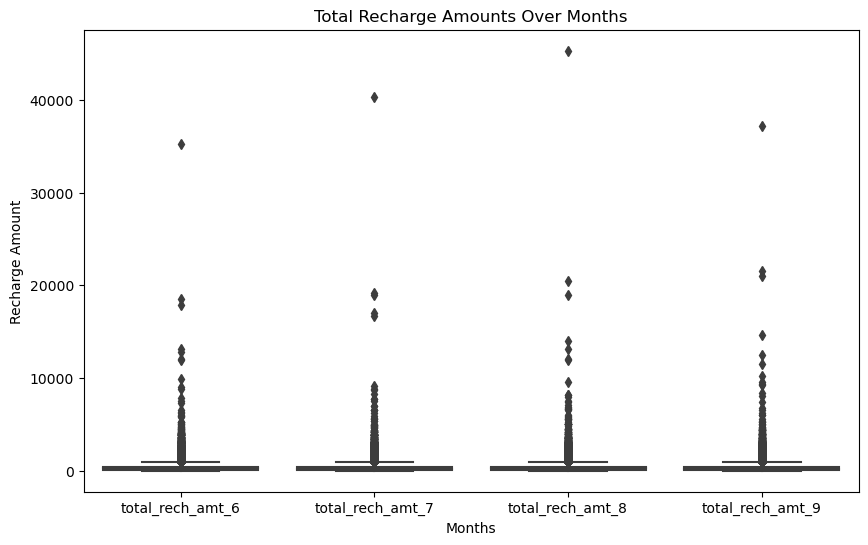

In [26]:
# Box Plot for Recharge Amounts
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_data[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9']])
plt.title('Total Recharge Amounts Over Months')
plt.xlabel('Months')
plt.ylabel('Recharge Amount')
plt.show()

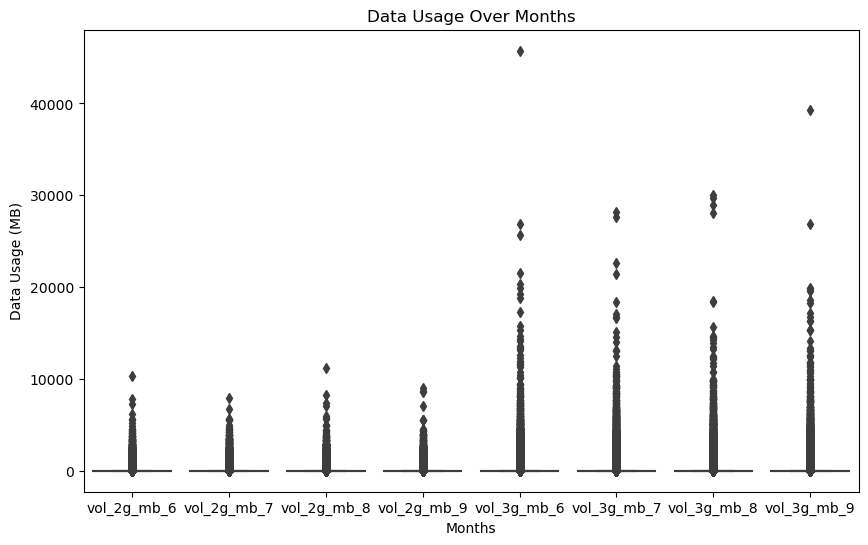

In [27]:
# Box Plot for Data Usage
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_data[['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9']])
plt.title('Data Usage Over Months')
plt.xlabel('Months')
plt.ylabel('Data Usage (MB)')
plt.show()

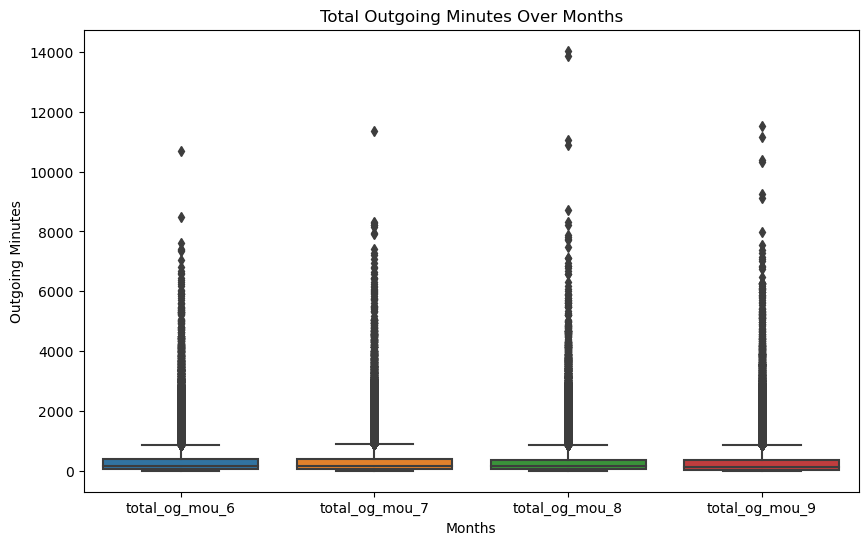

In [28]:
# Box Plot for Total Outgoing Minutes
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_data[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9']])
plt.title('Total Outgoing Minutes Over Months')
plt.xlabel('Months')
plt.ylabel('Outgoing Minutes')
plt.show()

In [29]:
# numerical_cols = [col for col in churn_data.columns if churn_data[col].dtype in ['float64', 'int64']]

# # Creating a correlation matrix
# correlation_matrix = churn_data[numerical_cols].corr()

# # Plotting the heatmap
# plt.figure(figsize=(40, 40))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()


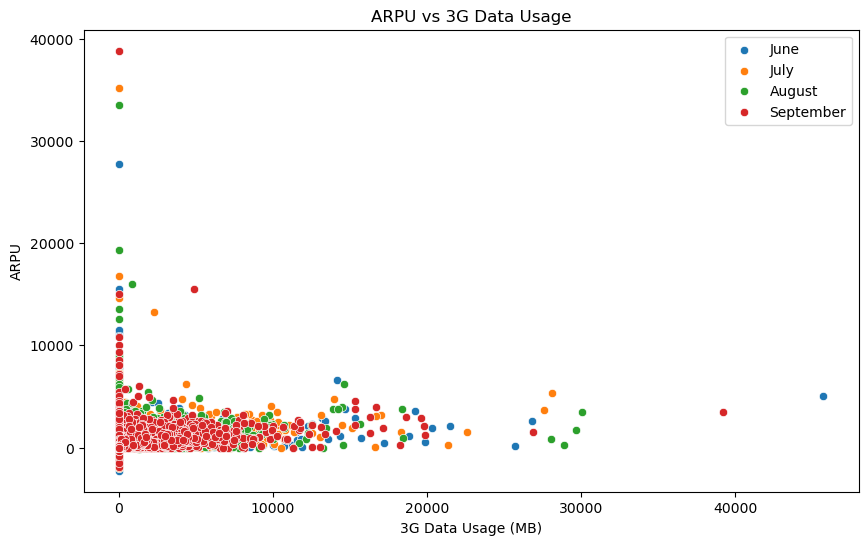

In [30]:
# Scatter Plot for ARPU vs 3G Data Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vol_3g_mb_6', y='arpu_6', data=churn_data, label='June')
sns.scatterplot(x='vol_3g_mb_7', y='arpu_7', data=churn_data, label='July')
sns.scatterplot(x='vol_3g_mb_8', y='arpu_8', data=churn_data, label='August')
sns.scatterplot(x='vol_3g_mb_9', y='arpu_9', data=churn_data, label='September')
plt.xlabel('3G Data Usage (MB)')
plt.ylabel('ARPU')
plt.title('ARPU vs 3G Data Usage')
plt.legend()
plt.show()


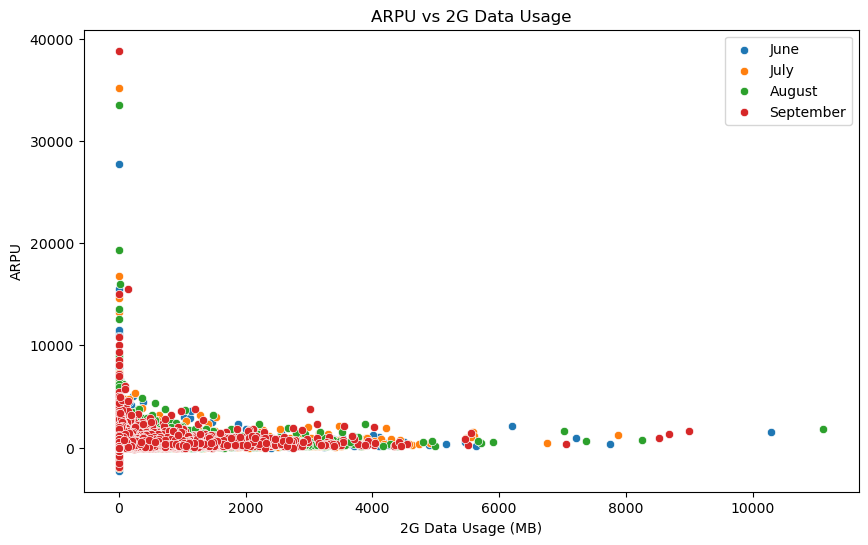

In [31]:
# Scatter Plot for ARPU vs 2G Data Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vol_2g_mb_6', y='arpu_6', data=churn_data, label='June')
sns.scatterplot(x='vol_2g_mb_7', y='arpu_7', data=churn_data, label='July')
sns.scatterplot(x='vol_2g_mb_8', y='arpu_8', data=churn_data, label='August')
sns.scatterplot(x='vol_2g_mb_9', y='arpu_9', data=churn_data, label='September')
plt.xlabel('2G Data Usage (MB)')
plt.ylabel('ARPU')
plt.title('ARPU vs 2G Data Usage')
plt.legend()
plt.show()


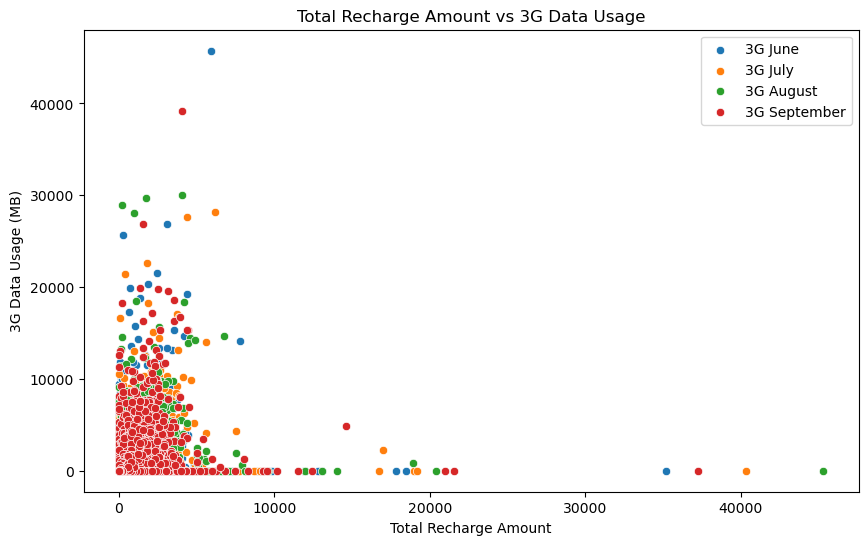

In [32]:
# Scatter Plot for Total Recharge Amount vs Data Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rech_amt_6', y='vol_3g_mb_6', data=churn_data, label='3G June')
sns.scatterplot(x='total_rech_amt_7', y='vol_3g_mb_7', data=churn_data, label='3G July')
sns.scatterplot(x='total_rech_amt_8', y='vol_3g_mb_8', data=churn_data, label='3G August')
sns.scatterplot(x='total_rech_amt_9', y='vol_3g_mb_9', data=churn_data, label='3G September')
plt.xlabel('Total Recharge Amount')
plt.ylabel('3G Data Usage (MB)')
plt.title('Total Recharge Amount vs 3G Data Usage')
plt.legend()
plt.show()


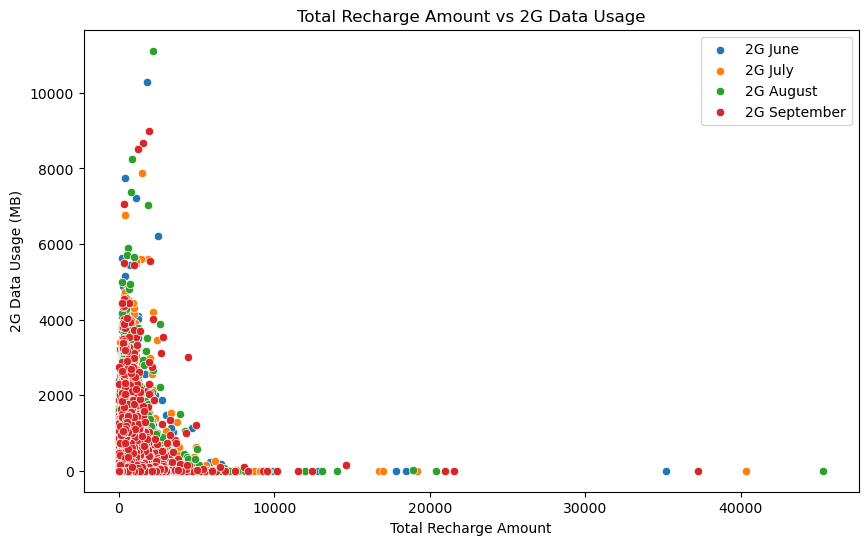

In [33]:
# Scatter Plot for Total Recharge Amount vs Data Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rech_amt_6', y='vol_2g_mb_6', data=churn_data, label='2G June')
sns.scatterplot(x='total_rech_amt_7', y='vol_2g_mb_7', data=churn_data, label='2G July')
sns.scatterplot(x='total_rech_amt_8', y='vol_2g_mb_8', data=churn_data, label='2G August')
sns.scatterplot(x='total_rech_amt_9', y='vol_2g_mb_9', data=churn_data, label='2G September')
plt.xlabel('Total Recharge Amount')
plt.ylabel('2G Data Usage (MB)')
plt.title('Total Recharge Amount vs 2G Data Usage')
plt.legend()
plt.show()

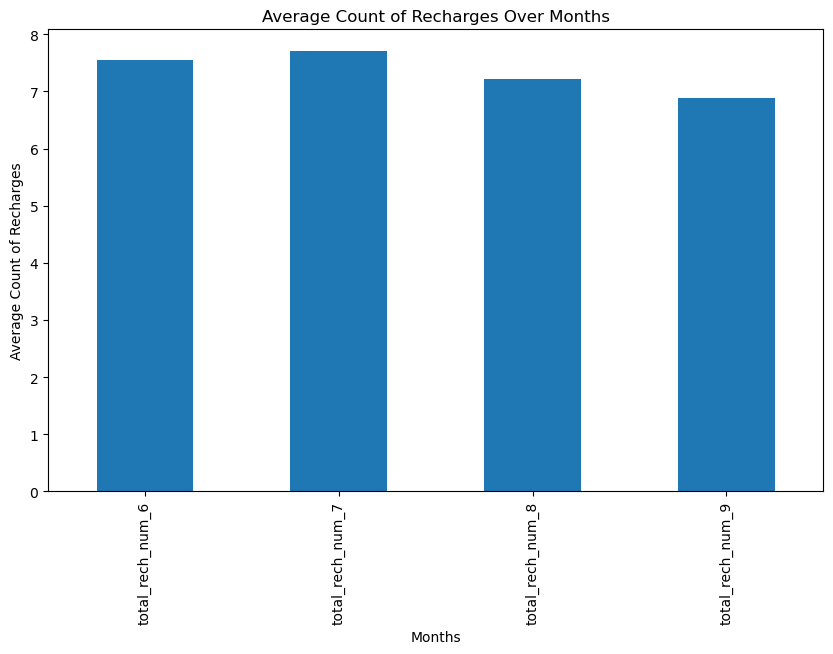

In [34]:
# Bar Plot for Count of Recharges
plt.figure(figsize=(10, 6))
churn_data[['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9']].mean().plot(kind='bar')
plt.title('Average Count of Recharges Over Months')
plt.xlabel('Months')
plt.ylabel('Average Count of Recharges')
plt.show()

<Figure size 1000x600 with 0 Axes>

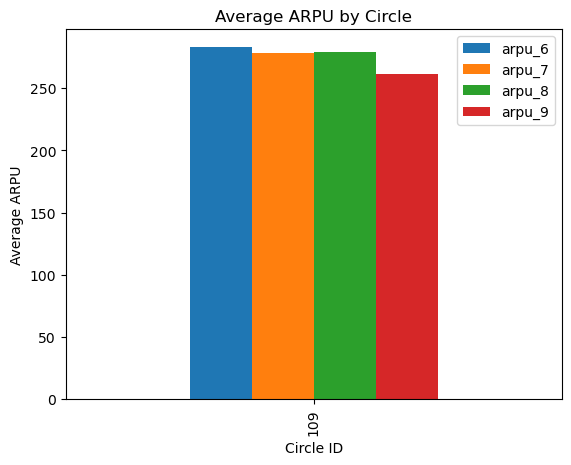

In [35]:
# Bar Plot for Average ARPU by Circle
plt.figure(figsize=(10, 6))
churn_data.groupby('circle_id')[['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9']].mean().plot(kind='bar')
plt.title('Average ARPU by Circle')
plt.xlabel('Circle ID')
plt.ylabel('Average ARPU')
plt.show()


<Figure size 1000x600 with 0 Axes>

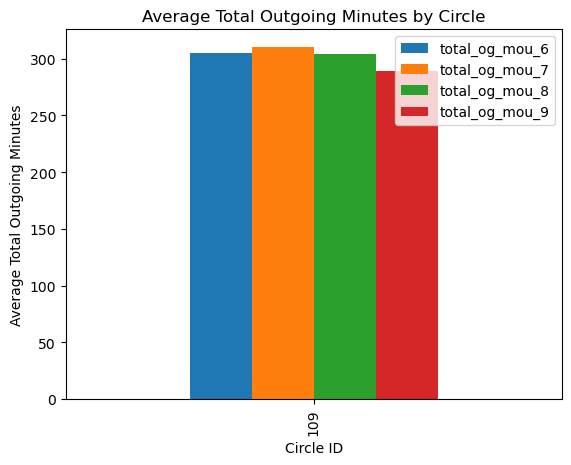

In [36]:
# Bar Plot for Average Total Outgoing Minutes by Circle
plt.figure(figsize=(10, 6))
churn_data.groupby('circle_id')[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9']].mean().plot(kind='bar')
plt.title('Average Total Outgoing Minutes by Circle')
plt.xlabel('Circle ID')
plt.ylabel('Average Total Outgoing Minutes')
plt.show()


## Feature Engineering

#### Deriving new features

In [37]:
#Calculate the growth or decline in usage metrics month over month.
# Deriving new features
churn_data['arpu_growth_7'] = (churn_data['arpu_7'] - churn_data['arpu_6']) / churn_data['arpu_6']
churn_data['arpu_growth_8'] = (churn_data['arpu_8'] - churn_data['arpu_7']) / churn_data['arpu_7']
churn_data['arpu_growth_9'] = (churn_data['arpu_9'] - churn_data['arpu_8']) / churn_data['arpu_8']

#### Filtering High Value Customers

In [38]:
# Filtering high value customers

# Calculate the average recharge amount for the two months
churn_data['average_rech'] = (churn_data['total_rech_amt_6'] + churn_data['total_rech_amt_7']) / 2

# 70th percentile of the average recharge
percentile_70 = churn_data['average_rech'].quantile(0.70)

# Filter the DataFrame
churn_data = churn_data[churn_data['average_rech'] >= percentile_70]


##### It can be seen that the size of the dataset reduced to 30k

In [39]:
# Checking the dimensions of the filtered data 
churn_data.shape

(30011, 184)

#### Tagging Churned Customers

In [40]:
# Tagging churned customers
churn_data['churn'] = ((churn_data['total_ic_mou_9'] == 0) & 
               (churn_data['total_og_mou_9'] == 0) & 
               (churn_data['vol_2g_mb_9'] == 0) & 
               (churn_data['vol_3g_mb_9'] == 0)).astype(int)

# Remove all attributes corresponding to the churn phase
columns_to_drop = [col for col in churn_data.columns if '_9' in col]

# dropping the columns
churn_data = churn_data.drop(columns=columns_to_drop)

In [41]:
churn_data.shape

(30011, 140)

# Model Building For Prediction

In [42]:
# importing the necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score


In [43]:
# Checking for Nans and infinite values before scaling
churn_data.drop(columns = ['mobile_number', 'circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], inplace = True)
# Checking for NaNs
nan_columns = churn_data.columns[churn_data.isna().any()].tolist()
print("Columns with NaNs:", nan_columns)

# Checking for infinite values
inf_columns = churn_data.columns[np.isinf(churn_data).any()].tolist()
print("Columns with infinities:", inf_columns)


Columns with NaNs: ['arpu_growth_8']
Columns with infinities: ['arpu_growth_7', 'arpu_growth_8']


In [44]:
# Replace infinities with NaN
churn_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaNs with column mean
churn_data.fillna(churn_data.mean(), inplace=True)

In [45]:
# Defining X and y
X = churn_data.drop(columns=['churn'])
y = churn_data['churn']

#### Scaling using Standard Scaler

In [46]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

#### PCA for dimensionality reduction

In [47]:
# PCA 
# Retaining 95% PCA
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
print("Number of components:", pca.n_components_)

Explained variance ratio: [0.09790769 0.08596563 0.05783563 0.04621438 0.03816498 0.0356239
 0.03079595 0.02709169 0.02614959 0.02474461 0.02342139 0.022382
 0.02150551 0.0208218  0.02032546 0.01897779 0.01614465 0.01528669
 0.01475228 0.01390555 0.01336003 0.01226894 0.01109309 0.01072105
 0.01069176 0.00988897 0.00978676 0.00914248 0.009065   0.00817587
 0.00784454 0.00782083 0.00776056 0.0075463  0.0074365  0.00719583
 0.00705771 0.00662556 0.00640484 0.00636711 0.00613201 0.00601313
 0.00588323 0.00572971 0.00559314 0.00510182 0.00500138 0.00490261
 0.00479549 0.00471853 0.00439227 0.00405483 0.00389356 0.00380584
 0.00371279 0.00360461 0.00349414 0.00332209 0.00328636 0.00328129
 0.00320505 0.00312973 0.00303514 0.00282287 0.00278702 0.00268668
 0.0026696  0.0025918  0.00255395]
Number of components: 69


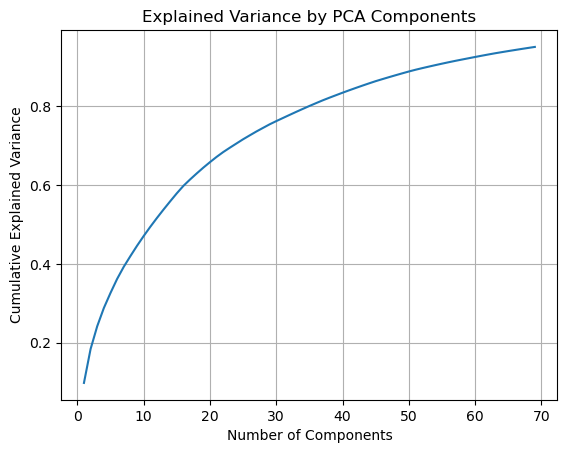

In [48]:
# Let's plot the PCA and variance
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

#### Train Test Split

In [49]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [50]:
# Building Random Forest Classifier 
rf = RandomForestClassifier(n_estimators=15,criterion= 'gini', max_depth = 10, 
                            min_samples_split= 5, min_samples_leaf = 3, oob_score = True, class_weight = 'balanced')

In [51]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=5, n_estimators=15,
                       oob_score=True)

In [52]:
# Checking the oob score
rf.oob_score_ # it's pretty good

0.8807064311896035

In [53]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [54]:
# Checking the accuracy of the train set 
print(accuracy_score(y_train, y_train_pred))
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_train

0.9328795163516923


array([[17966,  1221],
       [  189,  1631]], dtype=int64)

In [55]:
# Checking the accuracy of the test set
print(accuracy_score(y_test, y_test_pred))
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
confusion_matrix_test

0.8967125721901377


array([[7607,  624],
       [ 306,  467]], dtype=int64)

#### The accuracy seems well enough

In [56]:
# Evaluating the true churners
print("Recall Score for Training set : ", recall_score(y_train,y_train_pred))
print("Recall Score for Test set : ", recall_score(y_test, y_test_pred))

Recall Score for Training set :  0.8961538461538462
Recall Score for Test set :  0.6041397153945667


# Identifying the Important features
### Logistic Regression 

In [57]:
# Using Logistic Regression Classifier for identifying important features
# Considering the scaled data and not PCA.
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [58]:
lr= LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_lr, y_train_lr)

LogisticRegression(max_iter=1000, random_state=42)

In [59]:
y_train_pred_lr = lr.predict(X_train_lr)
y_test_pred_lr = lr.predict(X_test_lr)

In [60]:
# Checking the accuracy
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9328795163516923
0.8967125721901377


In [61]:
# Get feature importance
importance = lr.coef_[0]
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)


In [62]:
# Print Features importance
imp_df = pd.DataFrame({
    "Imp": feature_importance
})
imp_df.head(15)

,Imp
loc_ic_mou_8,3.161729
onnet_mou_8,2.000327
offnet_mou_8,1.915196
std_ic_mou_8,1.543588
isd_ic_mou_8,1.393523
loc_ic_mou_7,0.926329
loc_ic_t2t_mou_8,0.823306
std_ic_t2m_mou_8,0.682604
loc_ic_mou_6,0.655774
loc_ic_t2m_mou_8,0.563043


# Insights

### Usage Patterns: 
#####        The most important features are related to call usage patterns, particularly in the most recent months (month 8). This suggests that changes in how customers use their call services, especially in terms of local, on-net, off-net, STD, and ISD calls, are strong indicators of whether they will churn.
### Recent Activity: 
#####         More recent activity (month 8) is generally more predictive of churn than older activity (months 6 and 7), which aligns with the idea that churn decisions are often made over a relatively short period.
### Behavioral Changes: 
#####         Significant changes in these usage patterns might indicate dissatisfaction or intent to switch providers, making them critical for churn prediction.

# Stratergies

### Customer Retention Strategies: 
##### Monitoring these key usage metrics closely and identify customers who show significant changes in these patterns. Proactively addressing their issues by offering better plans, discounts, or improved services.
### Ongoing Monitoring: 
##### Regularly updating and monitoring these usage metrics to capture and respond to churn signals promptly.

# 